# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на  тарифы оператора связи . Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 

Постройм модель с максимально большим значением *accuracy*.

## Откройте и изучите файл

Цель проекта - построение системы для оператора сотовой связи, способной проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [2]:
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


## Разбейте данные на выборки

Наша задача разбить данные в пропорции 60% обучающая выборка, 20% валидационная и 20% тестовая выборка. Первым этапом, делим выборку в соотношении 60/40 на обучающую и остальные

In [5]:
df_train, df_last = train_test_split(df, test_size=0.4, random_state=12345)

вторым этапом делим оставшиеся 40% на 20/20, у нас получится валидационная и тестовая выборки.

In [6]:
df_valid, df_test = train_test_split(df_last, test_size=0.5, random_state=12345)

проверяем полученный результат

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 3027 to 482
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
 4   is_ultra  1928 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.4 KB


In [8]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1386 to 3197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 160 to 2313
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


проверяем сумму строк в получившихся выборках

In [10]:
1928+643+643


3214

In [11]:
len(df)

3214

все в порядке: разбивка на выборки правильная

In [12]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [13]:
df.duplicated().sum()

0

## Исследуйте модели

подготовим признаки и целевой признак для исследования

In [14]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

### исследуем модель дерево решений

In [15]:
%%time
for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score_valid = accuracy_score(predictions_valid,target_valid)
    print('Глубина =',depth,',score_valid = ',score_valid)

Глубина = 1 ,score_valid =  0.7542768273716952
Глубина = 2 ,score_valid =  0.7822706065318819
Глубина = 3 ,score_valid =  0.7853810264385692
Глубина = 4 ,score_valid =  0.7791601866251944
Глубина = 5 ,score_valid =  0.7791601866251944
Глубина = 6 ,score_valid =  0.7838258164852255
Глубина = 7 ,score_valid =  0.7822706065318819
Глубина = 8 ,score_valid =  0.7791601866251944
Глубина = 9 ,score_valid =  0.7822706065318819
CPU times: user 64.1 ms, sys: 8.41 ms, total: 72.5 ms
Wall time: 69 ms


In [16]:
#обучаем модель и собираем данные по каждой итерации цикла в список
listoTRAIN = []
for i in range(1,10):
    model = DecisionTreeClassifier(random_state=1,max_depth=i)
    model.fit(features_train,target_train)
    predict_train = model.predict(features_train)
    score_train = accuracy_score(predict_train,target_train)
    print('Глубина =',i,',score_valid = ',score_train)
    listoTRAIN.append(score_train) 

Глубина = 1 ,score_valid =  0.7577800829875518
Глубина = 2 ,score_valid =  0.7878630705394191
Глубина = 3 ,score_valid =  0.8075726141078838
Глубина = 4 ,score_valid =  0.8106846473029046
Глубина = 5 ,score_valid =  0.8200207468879668
Глубина = 6 ,score_valid =  0.8376556016597511
Глубина = 7 ,score_valid =  0.8558091286307054
Глубина = 8 ,score_valid =  0.8625518672199171
Глубина = 9 ,score_valid =  0.8807053941908713


In [17]:
#валидируем модель и собираем данные по каждой итерации цикла в список
listo = []
best_depth = 0
best_model = None
best_score = 0
for i in range(1,10):
    model = DecisionTreeClassifier(random_state=1,max_depth=i)
    model.fit(features_train,target_train)
    predict_valid = model.predict(features_valid)
    score_valid = accuracy_score(predict_valid,target_valid)
    print('Глубина =',i,',score_valid = ',score_valid)
    listo.append(score_valid)
    if score_valid>best_score:
        best_model = model
        best_score = score_valid
        best_depth=i

Глубина = 1 ,score_valid =  0.7542768273716952
Глубина = 2 ,score_valid =  0.7822706065318819
Глубина = 3 ,score_valid =  0.7853810264385692
Глубина = 4 ,score_valid =  0.7791601866251944
Глубина = 5 ,score_valid =  0.7791601866251944
Глубина = 6 ,score_valid =  0.7838258164852255
Глубина = 7 ,score_valid =  0.7822706065318819
Глубина = 8 ,score_valid =  0.7791601866251944
Глубина = 9 ,score_valid =  0.7838258164852255


<AxesSubplot:>

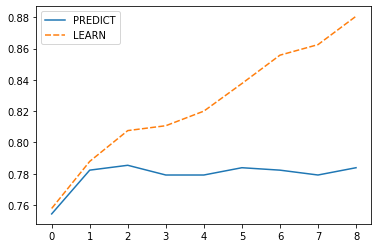

In [18]:
listoTRAIN = pd.Series(listoTRAIN)
listo = pd.Series(listo)
ALL = pd.DataFrame({'PREDICT': listo,
                            'LEARN': listoTRAIN})
sns.lineplot(data=ALL)

#### Вывод по данной модели: лучший результат показал варинт 3 - Глубина = 3 ,score_valid =  0.7853810264385692

### исследуем модель случайный лес деревьев

In [19]:
%%time
best_model = None
best_result = 0
for i in range(1, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators= i)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    score_valid = accuracy_score(predict_valid,target_valid)
    print('Кол-во деревьев =',i,',score_valid = ',score_valid)



Кол-во деревьев = 1 ,score_valid =  0.7107309486780715
Кол-во деревьев = 2 ,score_valid =  0.7636080870917574
Кол-во деревьев = 3 ,score_valid =  0.7387247278382582
Кол-во деревьев = 4 ,score_valid =  0.7713841368584758
Кол-во деревьев = 5 ,score_valid =  0.749611197511664
Кол-во деревьев = 6 ,score_valid =  0.7807153965785381
Кол-во деревьев = 7 ,score_valid =  0.7682737169517885
Кол-во деревьев = 8 ,score_valid =  0.7822706065318819
Кол-во деревьев = 9 ,score_valid =  0.7729393468118196
CPU times: user 222 ms, sys: 10.6 ms, total: 233 ms
Wall time: 241 ms


#### Вывод по данной модели: лучший результат на валидационной выборке: 0.7822706065318819

<font color='blue'Реализовал перебор 2 гиперпараметров в двойном цикле ниже   </font> 

In [25]:
best_model = None
best_score = 0
metTRAIN = [] #создаем пустой список, в который будем вкладывать варианты решений при переборе пгиперпараметров в цикле
for est in range(1, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_valid, target_valid)
        answers = model.predict(features_valid)
        score = accuracy_score(answers, target_valid)
        if score > best_score:
            best_mpdel = model
            best_score = score
        metTRAIN.append(score)
        print (score)
       
            
     


0.7573872472783826
0.7931570762052877
0.7776049766718507
0.8087091757387247
0.7978227060653188
0.8211508553654744
0.8195956454121306
0.8398133748055988
0.8413685847589425
0.7573872472783826
0.7931570762052877
0.7916018662519441
0.8040435458786936
0.8195956454121306
0.8258164852255054
0.8429237947122862
0.8460342146189735
0.8600311041990669
0.7589424572317263
0.7947122861586314
0.8040435458786936
0.8118195956454122
0.8180404354587869
0.838258164852255
0.8491446345256609
0.8740279937791602
0.8740279937791602
0.7589424572317263
0.7713841368584758
0.80248833592535
0.8164852255054432
0.8242612752721618
0.8429237947122862
0.8506998444790047
0.8740279937791602
0.8709175738724728
0.7542768273716952
0.7744945567651633
0.7993779160186625
0.8133748055987559
0.833592534992224
0.8506998444790047
0.8538102643856921
0.8895800933125972
0.8818040435458787
0.7542768273716952
0.7713841368584758
0.80248833592535
0.8180404354587869
0.8351477449455676
0.8475894245723172
0.8553654743390358
0.8740279937791602

### исследуем модель логистической регрессии

In [ ]:
%%time
model = LogisticRegression(random_state=123456789, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
score_valid = accuracy_score(predict_valid,target_valid)
print('Accuracy модели на валидационной выборке: = ',score_valid)


#### Вывод по данной модели:  результат на валидационной выборке: 0.7107309486780715

### Вывод по разделу 3: нами проведено обучение 3 моделей на обучающей выборке и валидация моделей на валижационной выборке. По итогам экспериментов, лучшие результаты показали модели дерево решений и случайный лес деревьев. С учетом того, что случайный лес модель более надежная, имеет смысл использовать в дальнейшей работе ее,если базовая цель - точность предсказания. Если же говорить про скорость работы, то дерево решений работает занчимо бытсрее. Таким образом, при выборе модели необходимо опираться на цель.

## Проверьте модель на тестовой выборке

In [ ]:
%%time

    model = RandomForestClassifier(random_state=12345, n_estimators= 8)
    model.fit(features_train, target_train)
    predict_test = model.predict(features_test)
    score_test = accuracy_score(predict_test,target_test)
    print('score_test = ',score_test)
  


### Вывод: с точки зрения качества предсказания, score_test =  0.7869362363919129, скорость работы модели, относительно других методов удовлетворительная. В целом, проведена работа по обучению модели на обучающей выборке, валидирование результатов на валидационной выборке и проверка работы модели на тестовой выборке. Целевые показатели достигнуты.

## Проверьте модели на адекватность

In [ ]:
model_dc = DummyClassifier(strategy='most_frequent', random_state=12345)
model_dc.fit(features_train, target_train)
result_dc = model_dc.score(features_valid, target_valid)
print('Точность простейшей модели:','{:.4f}'.format(result_dc))

#### Вывод: с учетом предсказательной точности простейшей модели, обученная нами модель адекватна.